In [1]:
!git clone https://github.com/adi9820/NMT_Project

Cloning into 'NMT_Project'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 22 (delta 5), reused 8 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 12.23 MiB | 19.78 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
import numpy as np
import pandas as pd

In [3]:
#read the file in text string
translations_text = open('/content/NMT_Project/fra-eng/fra.txt', 'r', encoding='utf-8').read()
translations_text = translations_text.lower()

In [4]:
def load_translations(doc):
    mapping = dict()

    # process lines
    for line in doc.split('\n'):
        tokens = line.split('\t')

        if len(tokens) < 2:
            continue

        english, french = tokens[0], tokens[1:]
        french = ' '.join(french)
        # remove everything except for French and English text
        french_cleaned = french.split(' cc-by')[0].strip()

        # Clean text (replace with your actual text cleaning logic)
        english = clean_text(english)
        french_cleaned = clean_text(french_cleaned)

        # create the list if needed
        if english not in mapping:
            mapping[english] = list()

        # store cleaned French translation
        if french_cleaned not in mapping[english]:
            mapping[english].append(french_cleaned)

    # Move the return statement outside the for loop
    return mapping

In [5]:
import string

def clean_text(text):
    # remove unwanted symbols from each token
    text = remove_unwanted_symbols(text)
    # remove tokens with numbers in them
    text = text.split()
    text = [word for word in text if word.isalpha()]
    # join the cleaned tokens into a single string
    cleaned_text = ' '.join(text)
    return cleaned_text

In [6]:
def remove_unwanted_symbols(text, unwanted_symbols="»«…"):
    # Define a translation table
    translation_table = str.maketrans("", "", string.punctuation.replace("'", "") + unwanted_symbols)
    # Use translate to remove unwanted symbols
    cleaned_text = text.translate(translation_table)
    return cleaned_text

In [7]:
translations=load_translations(translations_text)

In [8]:
translations

{'go': ['va',
  'marche',
  'en route',
  'bouge',
  '',
  'allonsy',
  'allons',
  'nous irons',
  'qui ira'],
 'hi': ['salut'],
 'run': ['cours',
  'courez',
  'prenez vos jambes à vos cous',
  'file',
  'filez',
  'fuyez',
  'fuyons',
  'ne courez pas',
  'ne cours pas'],
 'who': ['qui'],
 'wow': ['ça alors', 'waouh', 'wah'],
 'duck': ['à terre', 'baissetoi', 'baissezvous'],
 'fire': ['au feu'],
 'help': ['à',
  '',
  'nous apporterons de',
  'nous allons aider',
  'ça aidera',
  'ça va aider'],
 'hide': ['cachetoi', 'cachezvous'],
 'jump': ['saute', 'ne saute pas', 'ne sautez pas'],
 'stop': ['ça suffit', 'stop', 'arrêtetoi', '', 'ne vous arrêtez pas'],
 'wait': ['attends', 'attendez', '', 'pas', 'nous attendrons'],
 'begin': ['commencez', 'commence', 'commençons'],
 'go on': ['poursuis', 'continuez', 'poursuivez'],
 'hello': ['bonjour', 'salut'],
 'i see': ['je comprends',
  'aha',
  'je ne vois rien',
  'je pas à voir',
  'je ne parviens pas à voir',
  'je suis aveugle',
  'je ne

In [9]:
# save descriptions to file, one per line
def save_translations(translations, filename):
	lines = list()
	for key, translation_list in translations.items():
		for desc in translation_list:
			lines.append(key + '\t' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

In [10]:
save_translations(translations, "translations.txt")

In [11]:
from sklearn.model_selection import train_test_split

# Specify the path to your data file
data_file_path = '/content/translations.txt'
# Read the data from the file
with open(data_file_path, 'r') as file:
    data = file.readlines()
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# Write the training data to a new file
with open('train_data.txt', 'w') as train_file:
    train_file.writelines(train_data)
# Write the testing data to a new file
with open('test_data.txt', 'w') as test_file:
    test_file.writelines(test_data)

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
data_file_path = '/content/train_data.txt'
with open(data_file_path, 'r') as file:
    data = file.readlines()
# Split data into source and target sentences
source_sentences, target_sentences = zip(*[line.split('\t') for line in data])
# Tokenize source language sentences (English)
source_tokenizer = Tokenizer()
source_tokenizer.fit_on_texts(source_sentences)
source_sequences = source_tokenizer.texts_to_sequences(source_sentences) # integer encoding
source_vocab_length = len(source_tokenizer.word_index)+1
# Tokenize target language sentences (French)
target_tokenizer = Tokenizer()
target_tokenizer.fit_on_texts(target_sentences)
target_sequences = target_tokenizer.texts_to_sequences(target_sentences) # integer encoding
target_vocab_length = len(target_tokenizer.word_index)+1
# Define maximum sequence lengths
max_source_length = max(len(sentence_tokens) for sentence_tokens in source_sequences)
max_target_length = max(len(sentence_tokens) for sentence_tokens in target_sequences)
# Pad sequences
padded_source_sequences = pad_sequences(source_sequences, maxlen=max_source_length, padding='post', truncating='post')
padded_target_sequences = pad_sequences(target_sequences, maxlen=max_target_length, padding='post', truncating='post')

# Print some statistics
print("Number of unique tokens in source language:", source_vocab_length)
print("Number of unique tokens in target language:", target_vocab_length)
print("Maximum source sequence length:", max_source_length)
print("Maximum target sequence length:", max_target_length)
print("Shape of padded source sequences:", padded_source_sequences.shape)
print("Shape of padded target sequences:", padded_target_sequences.shape)

Number of unique tokens in source language: 15137
Number of unique tokens in target language: 25955
Maximum source sequence length: 47
Maximum target sequence length: 51
Shape of padded source sequences: (181741, 47)
Shape of padded target sequences: (181741, 51)


In [14]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, RepeatVector, Dense, TimeDistributed

In [15]:
def define_model(source_vocab_length, target_vocab_length, max_source_length, max_target_length, units):
      model = Sequential()
      # Encoder
      model.add(Embedding(input_dim=source_vocab_length, output_dim=units, input_length=max_source_length, mask_zero=True))
      model.add(LSTM(units=units))
      # RepeatVector to connect Encoder to Decoder
      model.add(RepeatVector(max_target_length))
      # Decoder
      model.add(LSTM(units=units, return_sequences=True))
      model.add(TimeDistributed(Dense(target_vocab_length, activation='softmax')))
      return model

In [16]:
model=define_model(source_vocab_length,target_vocab_length, max_source_length,max_target_length,256)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 256)           3875072   
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVecto  (None, 51, 256)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 51, 256)           525312    
                                                                 
 time_distributed (TimeDist  (None, 51, 25955)         6670435   
 ributed)                                                        
                                                                 
Total params: 11596131 (44.24 MB)
Trainable params: 1159

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
# Define the filename for the best model checkpoint
filepath = 'modelNMT-ep{epoch:03d}-accuracy{accuracy:.3f}-val_acc{val_accuracy:.3f}.h5'
# Set up ModelCheckpoint to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)
# Train the model with early stopping
history = model.fit(padded_source_sequences, padded_target_sequences.reshape(padded_target_sequences.shape[0], padded_target_sequences.shape[1], 1),
                    epochs=50, batch_size=512, validation_split=0.2,
                    callbacks=[checkpoint, early_stopping], verbose=1)

Epoch 1/50
284/284 [==============================] - ETA: 0s - loss: 1.4328 - accuracy: 0.8799
Epoch 1: val_loss improved from inf to 0.86866, saving model to modelNMT-ep001-accuracy0.880-val_acc0.883.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


284/284 [==============================] - 321s 1s/step - loss: 1.4328 - accuracy: 0.8799 - val_loss: 0.8687 - val_accuracy: 0.8831
Epoch 2/50
284/284 [==============================] - ETA: 0s - loss: 0.8390 - accuracy: 0.8863
Epoch 2: val_loss improved from 0.86866 to 0.81852, saving model to modelNMT-ep002-accuracy0.886-val_acc0.886.h5
284/284 [==============================] - 303s 1s/step - loss: 0.8390 - accuracy: 0.8863 - val_loss: 0.8185 - val_accuracy: 0.8864
Epoch 3/50
284/284 [==============================] - ETA: 0s - loss: 0.8088 - accuracy: 0.8882
Epoch 3: val_loss improved from 0.81852 to 0.79789, saving model to modelNMT-ep003-accuracy0.888-val_acc0.889.h5
284/284 [==============================] - 313s 1s/step - loss: 0.8088 - accuracy: 0.8882 - val_loss: 0.7979 - val_accuracy: 0.8895
Epoch 4/50
284/284 [==============================] - ETA: 0s - loss: 0.7880 - accuracy: 0.8895
Epoch 4: val_loss improved from 0.79789 to 0.78902, saving model to modelNMT-ep004-accurac

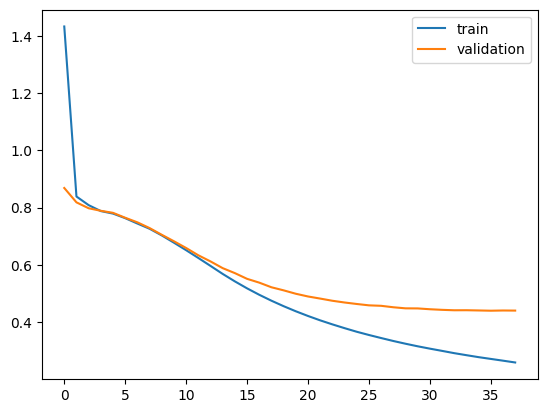

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()